In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import metrics

In [16]:
df = pd.read_csv('../data/train_data_encoded_full.csv')
df['weight'] = df['weight'] * 0.2
print('shape:', df.shape)
df.head(5)

shape: (39829, 7)


,weight,quality,color,clarity,table_percent,price,depth_percent
0,0.060,3,6,1,0.58,1.848927,0.624
1,0.202,4,5,5,0.56,2.217354,0.627
2,0.144,4,4,3,0.59,2.077314,0.618
3,0.216,2,3,1,0.57,2.124773,0.632
4,0.072,3,3,4,0.59,1.885250,0.623


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,39829.0,0.158266,0.093548,0.040000,0.080000,0.140000,0.208000,0.526000
quality,39829.0,2.941299,1.081480,0.000000,2.000000,3.000000,4.000000,4.000000
color,39829.0,3.414371,1.702600,0.000000,2.000000,3.000000,5.000000,6.000000
clarity,39829.0,3.065631,1.642181,0.000000,2.000000,3.000000,4.000000,7.000000
table_percent,39829.0,0.574093,0.021549,0.490000,0.560000,0.570000,0.590000,0.660000
price,39829.0,2.042662,0.131350,1.755614,1.923957,2.050399,2.149201,2.286659
depth_percent,39829.0,0.617414,0.012922,0.573000,0.611000,0.618000,0.625000,0.662000


In [33]:
df = df.loc[df['weight'] < 0.35]

In [34]:
#split dara train and test
X = df.drop(["price"], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())
print('\n')
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de entrenamiento
-----------------------
count    30490.000000
mean         2.032576
std          0.125831
min          1.755614
25%          1.919126
50%          2.040961
75%          2.138182
max          2.286659
Name: price, dtype: float64


Datos de testeo
-----------------------
count    7623.000000
mean        2.034252
std         0.125165
min         1.760785
25%         1.920153
50%         2.042518
75%         2.140184
max         2.286557
Name: price, dtype: float64


In [35]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [36]:
param = {"max_depth": [6, 8, 10],
        "max_features": [6, 8, 10],
        "min_samples_split": [15]}

decision_tree = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            n_jobs=-1,
            verbose=1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

%time
decision_tree.fit(X_train, y_train)
best_dt = decision_tree.best_estimator_
print('best tree:', best_dt)
y_pred_test_dt = best_dt.predict(X_test)
y_pred_train_dt = best_dt.predict(X_train)
dt_results_1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decision tree 1")
dt_results_1.style.background_gradient(cmap='coolwarm')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 10.7 µs
Fitting 10 folds for each of 9 candidates, totalling 90 fits
best tree: DecisionTreeRegressor(max_depth=10, max_features=10, min_samples_split=15)


,MAE,MSE,RMSE,R2,set,modelo
0,0.011871,0.000244,0.015619,0.984426,test,Decision tree 1
1,0.011030,0.000206,0.014365,0.986967,train,Decision tree 1


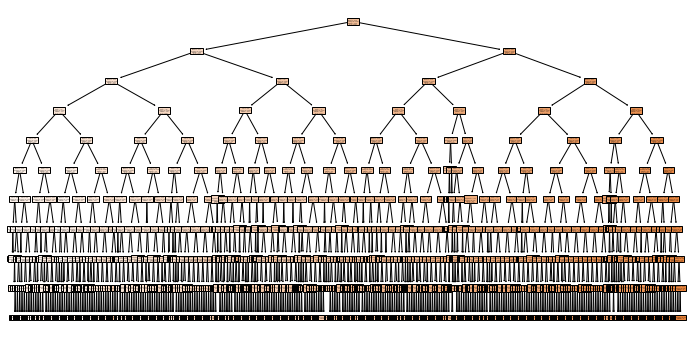

In [37]:
fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_dt, feature_names=X_train.columns, filled=True);  

In [38]:
param = {"max_depth": [8, 10, 12],
        "max_features": [4, 8],
        "min_samples_split": [10, 50, 100]}

decision_tree = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            n_jobs=-1,
            verbose=1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

%time
decision_tree.fit(X_train, y_train)
best_dt = decision_tree.best_estimator_
print('best tree:', best_dt)
y_pred_test_dt = best_dt.predict(X_test)
y_pred_train_dt = best_dt.predict(X_train)
dt_results_2 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decision tree 2")
dt_results_2.style.background_gradient(cmap='coolwarm')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs
Fitting 10 folds for each of 18 candidates, totalling 180 fits
best tree: DecisionTreeRegressor(max_depth=12, max_features=8, min_samples_split=10)


,MAE,MSE,RMSE,R2,set,modelo
0,0.011194,0.000228,0.015095,0.985455,test,Decision tree 2
1,0.009252,0.000153,0.012356,0.990357,train,Decision tree 2


In [41]:
y_pred_test_dt

array([2.13797595, 2.21736699, 2.0014445 , ..., 2.07195922, 2.17516445,
       2.13371742])

In [39]:
param = {"max_depth": [12, 18],
        "max_features": [8, 12],
        "min_samples_split": [10, 50, 100]}

decision_tree = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            n_jobs=-1,
            verbose=1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

%time
decision_tree.fit(X_train, y_train)
best_dt = decision_tree.best_estimator_
print('best tree:', best_dt)
y_pred_test_dt = best_dt.predict(X_test)
y_pred_train_dt = best_dt.predict(X_train)
dt_results_3 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decision tree 3")
dt_results_3.style.background_gradient(cmap='coolwarm')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.15 µs
Fitting 10 folds for each of 12 candidates, totalling 120 fits
best tree: DecisionTreeRegressor(max_depth=12, max_features=8, min_samples_split=10)


,MAE,MSE,RMSE,R2,set,modelo
0,0.011201,0.000228,0.015104,0.985436,test,Decision tree 3
1,0.009252,0.000153,0.012356,0.990357,train,Decision tree 3


In [40]:
df_results = pd.concat([dt_results_1, dt_results_2, dt_results_3], axis = 0)
df_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.011871,0.000244,0.015619,0.984426,test,Decision tree 1
1,0.011030,0.000206,0.014365,0.986967,train,Decision tree 1
0,0.011194,0.000228,0.015095,0.985455,test,Decision tree 2
1,0.009252,0.000153,0.012356,0.990357,train,Decision tree 2
0,0.011201,0.000228,0.015104,0.985436,test,Decision tree 3
1,0.009252,0.000153,0.012356,0.990357,train,Decision tree 3
